# Neural Networks Training

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import optimize
from scipy.io import loadmat

In [2]:
data = loadmat("ex4data1.mat")
X, y = data["X"], data["y"].ravel()

In [3]:
print(X.shape)
print(y.shape)

(5000, 400)
(5000,)


In [4]:
weight = loadmat("ex4weights.mat")
Theta1, Theta2 = weight["Theta1"], weight["Theta2"]

In [5]:
print(Theta1.shape)
print(Theta2.shape)

(25, 401)
(10, 26)


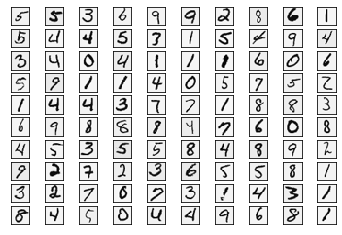

In [6]:
# Visualizing the data
plt.figure()
rng = np.random.RandomState(0)
for i in range(100):
    plt.subplot(10, 10, i + 1)
    plt.imshow(X[rng.randint(X.shape[0])].reshape((20, 20)).T,
               cmap=plt.cm.binary, interpolation='nearest')
    plt.xticks([])
    plt.yticks([])
plt.show()

In [7]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [8]:
def sigmoidGradient(z):
    return np.multiply(sigmoid(z), 1 - sigmoid(z))

In [9]:
print(sigmoidGradient(np.array([[-1, -0.5, 0, 0.5, 1]])))
# 0.196612 0.235004 0.250000 0.235004 0.196612

[[0.19661193 0.23500371 0.25       0.23500371 0.19661193]]


In [10]:
def randInitializeWeights(L_in, L_out):
    epsilon_init = 0.12
    rng = np.random.RandomState(0)
    W = rng.rand(L_out, L_in + 1) * epsilon_init * 2 - epsilon_init
    return W

$$J(\theta) = \frac{1}{m} \sum_{i=1}^m{\sum_{k=1}^K{
    [-y^{(i)}_k \log{((h_{\theta}}(x^{(i)}))_k) -
    (1 - y^{(i)}_k) \log{(1 - (h_{\theta}}(x^{(i)}))_k)]}} +
    \frac{\lambda}{2m}[\sum_{j=1}^{25}{\sum_{k=1}^{400}{(\theta_{j,k}^{(1)})^2}} +
    \sum_{j=1}^{10}{\sum_{k=1}^{25}{(\theta_{j,k}^{(2)})^2}}]$$

In [11]:
def nnCostFunction(nn_params, input_layer_size, hidden_layer_size,
                   num_labels, X, y, lam):
    Theta1 = nn_params[:hidden_layer_size * (input_layer_size + 1)]
    Theta1 = Theta1.reshape((hidden_layer_size, input_layer_size + 1))
    Theta2 = nn_params[hidden_layer_size * (input_layer_size + 1):]
    Theta2 = Theta2.reshape((num_labels, hidden_layer_size + 1))

    X_train = np.hstack((np.ones((X.shape[0], 1)), X))
    A2 = sigmoid(np.dot(X_train, Theta1.T))
    A2 = np.hstack((np.ones((A2.shape[0], 1)), A2))
    A3 = sigmoid(np.dot(A2, Theta2.T))
    y_train = np.zeros((X.shape[0], num_labels))
    y_train[np.arange(X.shape[0]), y - 1] = 1
    J = -np.multiply(y_train, np.log(A3)) - np.multiply(1 - y_train, np.log(1 - A3))
    J = np.sum(J) / X.shape[0]

    reg = np.sum(np.power(Theta1[:, 1:], 2)) + np.sum(np.power(Theta2[:, 1:], 2))
    J += (reg * lam) / (2 * X.shape[0])

    Theta1_grad = np.zeros(Theta1.shape)
    Theta2_grad = np.zeros(Theta2.shape)
    delta3 = A3 - y_train
    delta2 = np.multiply(np.dot(delta3, Theta2), np.multiply(A2, 1 - A2))
    for i in range(X.shape[0]):
        Theta1_grad += np.dot(delta2[i, 1:][:, np.newaxis], np.atleast_2d(X_train[i]))
        Theta2_grad += np.dot(delta3[i][:, np.newaxis], np.atleast_2d(A2[i]))
    Theta1_grad /= X.shape[0]
    Theta2_grad /= X.shape[0]

    Theta1_grad[:, 1:] += lam * Theta1[:, 1:] / X.shape[0]
    Theta2_grad[:, 1:] += lam * Theta2[:, 1:] / X.shape[0]
    grad = np.hstack((Theta1_grad.ravel(), Theta2_grad.ravel()))
    return J, grad

In [12]:
def cost(nn_params, input_layer_size, hidden_layer_size,
         num_labels, X, y, lam):
    Theta1 = nn_params[:hidden_layer_size * (input_layer_size + 1)]
    Theta1 = Theta1.reshape((hidden_layer_size, input_layer_size + 1))
    Theta2 = nn_params[hidden_layer_size * (input_layer_size + 1):]
    Theta2 = Theta2.reshape((num_labels, hidden_layer_size + 1))

    X_train = np.hstack((np.ones((X.shape[0], 1)), X))
    A2 = sigmoid(np.dot(X_train, Theta1.T))
    A2 = np.hstack((np.ones((A2.shape[0], 1)), A2))
    A3 = sigmoid(np.dot(A2, Theta2.T))
    y_train = np.zeros((X.shape[0], num_labels))
    y_train[np.arange(X.shape[0]), y - 1] = 1
    J = -np.multiply(y_train, np.log(A3)) - np.multiply(1 - y_train, np.log(1 - A3))
    J = np.sum(J) / X.shape[0]

    reg = np.sum(np.power(Theta1[:, 1:], 2)) + np.sum(np.power(Theta2[:, 1:], 2))
    J += (reg * lam) / (2 * X.shape[0])
    return J


def gradient(nn_params, input_layer_size, hidden_layer_size,
             num_labels, X, y, lam):
    Theta1 = nn_params[:hidden_layer_size * (input_layer_size + 1)]
    Theta1 = Theta1.reshape((hidden_layer_size, input_layer_size + 1))
    Theta2 = nn_params[hidden_layer_size * (input_layer_size + 1):]
    Theta2 = Theta2.reshape((num_labels, hidden_layer_size + 1))

    X_train = np.hstack((np.ones((X.shape[0], 1)), X))
    A2 = sigmoid(np.dot(X_train, Theta1.T))
    A2 = np.hstack((np.ones((A2.shape[0], 1)), A2))
    A3 = sigmoid(np.dot(A2, Theta2.T))
    y_train = np.zeros((X.shape[0], num_labels))
    y_train[np.arange(X.shape[0]), y - 1] = 1

    Theta1_grad = np.zeros(Theta1.shape)
    Theta2_grad = np.zeros(Theta2.shape)
    delta3 = A3 - y_train
    delta2 = np.multiply(np.dot(delta3, Theta2), np.multiply(A2, 1 - A2))
    for i in range(X.shape[0]):
        Theta1_grad += np.dot(delta2[i, 1:][:, np.newaxis], np.atleast_2d(X_train[i]))
        Theta2_grad += np.dot(delta3[i][:, np.newaxis], np.atleast_2d(A2[i]))
    Theta1_grad /= X.shape[0]
    Theta2_grad /= X.shape[0]

    Theta1_grad[:, 1:] += lam * Theta1[:, 1:] / X.shape[0]
    Theta2_grad[:, 1:] += lam * Theta2[:, 1:] / X.shape[0]
    grad = np.hstack((Theta1_grad.ravel(), Theta2_grad.ravel()))
    return grad

In [13]:
input_layer_size = 400
hidden_layer_size = 25
num_labels = 10
nn_params = np.hstack((Theta1.ravel(), Theta2.ravel()))
lam = 0
J, grad = nnCostFunction(nn_params, input_layer_size, hidden_layer_size,
                         num_labels, X, y, lam)
print(J)  # 0.287629

0.2876291651613189


In [14]:
input_layer_size = 400
hidden_layer_size = 25
num_labels = 10
nn_params = np.hstack((Theta1.ravel(), Theta2.ravel()))
lam = 1
J, grad = nnCostFunction(nn_params, input_layer_size, hidden_layer_size,
                         num_labels, X, y, lam)
print(J)  # 0.383770

0.38376985909092365


In [15]:
# Gradient checking
def checkNNGradients(lam):
    input_layer_size = 3
    hidden_layer_size = 5
    num_labels = 3
    m = 5
    initial_Theta1 = randInitializeWeights(input_layer_size, hidden_layer_size)
    initial_Theta2 = randInitializeWeights(hidden_layer_size, num_labels)
    rng = np.random.RandomState(0)
    X = rng.rand(m, input_layer_size)
    y = rng.randint(num_labels, size=m)
    nn_params = np.hstack((initial_Theta1.ravel(), initial_Theta2.ravel()))
    _, grad = nnCostFunction(nn_params, input_layer_size, hidden_layer_size, num_labels, X, y, lam)
    num_grad = np.zeros(len(grad))
    e = 1e-4
    for i in range(len(grad)):
        nn_params1 = nn_params.copy()
        nn_params1[i] += e
        cost1 = cost(nn_params1, input_layer_size, hidden_layer_size, num_labels, X, y, lam)
        nn_params2 = nn_params.copy()
        nn_params2[i] -= e
        cost2 = cost(nn_params2, input_layer_size, hidden_layer_size, num_labels, X, y, lam)
        num_grad[i] = (cost1 - cost2) / (2 * e)
    print(grad[:5])
    print(num_grad[:5])
    assert np.linalg.norm(grad - num_grad) / np.linalg.norm(grad + num_grad) < 1e-9

In [16]:
checkNNGradients(0)

[0.0114253  0.00554851 0.00865516 0.0062458  0.00759429]
[0.0114253  0.00554851 0.00865516 0.0062458  0.00759429]


In [17]:
checkNNGradients(3)

[0.0114253  0.03653578 0.02345308 0.01270898 0.00759429]
[0.0114253  0.03653578 0.02345308 0.01270898 0.00759429]


In [18]:
input_layer_size = 400
hidden_layer_size = 25
num_labels = 10
initial_Theta1 = randInitializeWeights(input_layer_size, hidden_layer_size)
initial_Theta2 = randInitializeWeights(hidden_layer_size, num_labels)
nn_params = np.hstack((initial_Theta1.ravel(), initial_Theta2.ravel()))
lam = 1
res = optimize.minimize(fun=cost, x0=nn_params,
                        args=(input_layer_size, hidden_layer_size, num_labels, X, y, lam),
                        method='CG', jac=gradient, options={"maxiter": 50})

In [19]:
Theta1 = res.x[:hidden_layer_size * (input_layer_size + 1)]
Theta1 = Theta1.reshape((hidden_layer_size, input_layer_size + 1))
Theta2 = res.x[hidden_layer_size * (input_layer_size + 1):]
Theta2 = Theta2.reshape((num_labels, hidden_layer_size + 1))

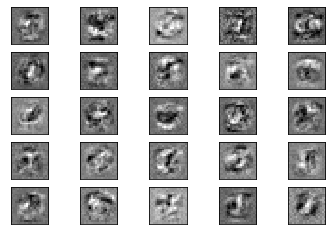

In [20]:
# Visualizing the hidden layer
plt.figure()
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(Theta1[i, 1:].reshape((20, 20)).T,
               cmap=plt.cm.binary, interpolation='nearest')
    plt.xticks([])
    plt.yticks([])
plt.show()

In [21]:
def predict(Theta1, Theta2, X):
    X = np.hstack((np.ones((X.shape[0], 1)), X))
    A2 = sigmoid(np.dot(X, Theta1.T))
    A2 = np.hstack((np.ones((A2.shape[0], 1)), A2))
    A3 = sigmoid(np.dot(A2, Theta2.T))
    pred = np.argmax(A3, axis=1) + 1
    return pred

In [22]:
print(np.mean(predict(Theta1, Theta2, X) == y))

0.9626
